In [22]:
import os 
import numpy as np
import glob
import re
import pandas as pd
import plotly.express as px
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import statistics
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pull files to pull

In [2]:
def get_csv_filenames(filePath = os.getcwd()):
    placeholder = os.getcwd()
    _list = []
    if os.getcwd() != filePath: 
        try:
            os.chdir(filePath)
        except:
            print("something is wrong with the file path")
    try:
        _list =  glob.glob("*.csv")
    except:
            print("something is wrong with the file path")
    return _list

pull files

In [3]:
def setup_severe_weather_df(filePath = os.getcwd()):
    _list = get_csv_filenames(filePath)
    df = []
    if (len(_list)==0):
        return 0
    p_df = []
    for i in _list:
        try:
            p_df = pd.read_csv(i, index_col=None, header=0)
            p_df["filename"] = i
            df.append(p_df) 
        except:
            print("something is wrong with the file: {}".format(i))
    final_df = pd.concat(df, axis=0, ignore_index=True)
    return final_df

In [4]:
weather_df = setup_severe_weather_df('C:\\Users\\alero\\Documents\\DSC_530_Project_Tornadoes')

C:\Users\alero\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning:

Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\alero\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning:

Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\alero\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning:

Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
weather_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,filename
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,1950,April,Tornado,C,149,WASHITA,NaN,28-APR-50 14:45:00,CST,28-APR-50 14:45:00,0,0,0,0,250K,0,NaN,0.0,NaN,NaN,NaN,F3,3.4,400.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB,StormEvents_details-ftp_v1.0_d1950_c20170120.csv
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,1950,April,Tornado,C,93,COMANCHE,NaN,29-APR-50 15:30:00,CST,29-APR-50 15:30:00,0,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F1,11.5,200.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB,StormEvents_details-ftp_v1.0_d1950_c20170120.csv
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,1950,July,Tornado,C,77,LEHIGH,NaN,05-JUL-50 18:00:00,CST,05-JUL-50 18:00:00,2,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F2,12.9,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB,StormEvents_details-ftp_v1.0_d1950_c20170120.csv
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,1950,July,Tornado,C,43,DAUPHIN,NaN,05-JUL-50 18:30:00,CST,05-JUL-50 18:30:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F2,0.0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB,StormEvents_details-ftp_v1.0_d1950_c20170120.csv
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,1950,July,Tornado,C,39,CRAWFORD,NaN,24-JUL-50 14:40:00,CST,24-JUL-50 14:40:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F0,0.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB,StormEvents_details-ftp_v1.0_d1950_c20170120.csv


Below I display the types of server weather documented in the documents. We will only be pulling tornadeos for this excercise. 

In [7]:
pd.set_option('display.max_rows', 500)
weather_df.EVENT_TYPE.value_counts().sort_index()

Astronomical Low Tide                547
Avalanche                            654
Blizzard                           13890
Coastal Flood                       3084
Cold/Wind Chill                    14190
Debris Flow                         1146
Dense Fog                          13104
Dense Smoke                           84
Drought                            55403
Dust Devil                           227
Dust Storm                          1122
Excessive Heat                      8360
Extreme Cold/Wind Chill            12219
Flash Flood                        84931
Flood                              55380
Freezing Fog                         409
Frost/Freeze                       11960
Funnel Cloud                        8591
HAIL FLOODING                          1
HAIL/ICY ROADS                         1
Hail                              367881
Heat                               21009
Heavy Rain                         25129
Heavy Snow                         61552
Heavy Wind      

Checking for null values

In [6]:
weather_df.isna().sum()

BEGIN_YEARMONTH             0
BEGIN_DAY                   0
BEGIN_TIME                  0
END_YEARMONTH               0
END_DAY                     0
END_TIME                    0
EPISODE_ID             232239
EVENT_ID                    0
STATE                       1
STATE_FIPS                  1
YEAR                        0
MONTH_NAME                  0
EVENT_TYPE                  0
CZ_TYPE                     0
CZ_FIPS                     0
CZ_NAME                  1557
WFO                    125573
BEGIN_DATE_TIME             0
CZ_TIMEZONE                 0
END_DATE_TIME               0
INJURIES_DIRECT             0
INJURIES_INDIRECT           0
DEATHS_DIRECT               0
DEATHS_INDIRECT             0
DAMAGE_PROPERTY        520309
DAMAGE_CROPS           632146
SOURCE                 345865
MAGNITUDE              662149
MAGNITUDE_TYPE        1216546
FLOOD_CAUSE           1510735
CATEGORY              1595400
TOR_F_SCALE           1526949
TOR_LENGTH            1330303
TOR_WIDTH 

Only look at tornado data.

In [17]:
t_df = weather_df[weather_df.EVENT_TYPE=="Tornado"][['YEAR', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',  'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH']]

In [12]:
t_df.head(10)

,YEAR,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
0,1950,0,0,0,0,250K,0,F3,3.4,400.0
1,1950,0,0,0,0,25K,0,F1,11.5,200.0
2,1950,2,0,0,0,25K,0,F2,12.9,33.0
3,1950,0,0,0,0,2.5K,0,F2,0.0,13.0
4,1950,0,0,0,0,2.5K,0,F0,0.0,33.0
5,1950,0,0,0,0,2.5K,0,F1,1.0,33.0
6,1950,1,0,0,0,250K,0,F3,4.7,100.0
7,1950,0,0,0,0,250K,0,F3,11.2,100.0
8,1950,6,0,0,0,250K,0,F2,6.8,100.0
9,1950,0,0,0,0,.25K,0,F0,0.0,33.0


In [13]:
t_df.tail(10)

,YEAR,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
1595615,2019,0,0,0,0,NaN,NaN,EF0,5.90,50.0
1595616,2019,0,0,0,0,0.00K,0.00K,EFU,2.84,50.0
1595628,2019,0,0,0,0,0.00K,0.00K,EF0,0.65,25.0
1595635,2019,0,0,0,0,NaN,NaN,EF0,0.51,20.0
1595670,2019,0,0,0,0,NaN,NaN,EF0,2.58,20.0
1595671,2019,0,0,0,0,NaN,NaN,EF0,3.20,40.0
1595672,2019,0,0,0,0,0.00K,0.00K,EF0,0.10,10.0
1595673,2019,0,0,0,0,NaN,NaN,EF0,0.19,10.0
1595688,2019,0,0,0,0,25.00K,0.00K,EF1,0.45,400.0
1595718,2019,0,0,0,0,60.00K,0.00K,EF0,2.82,150.0


Showing all variables that are missing. 

In [18]:
t_df.isna().sum()

YEAR                     0
INJURIES_DIRECT          0
INJURIES_INDIRECT        0
DEATHS_DIRECT            0
DEATHS_INDIRECT          0
DAMAGE_PROPERTY       8842
DAMAGE_CROPS         15288
TOR_F_SCALE           1970
TOR_LENGTH              28
TOR_WIDTH               28
dtype: int64

Since we are doing a year over year comparison, I will take the means of the variables, but first I will take care of the missing values. The Fujita scale, I will transform those so they have their own column, EF0 (total), etc...

Lets start with injuries direct, first we will take the mean of the injuries and check the scatter plot. 

In [19]:
tornado = t_df.groupby('YEAR',as_index = False).agg({"INJURIES_DIRECT": "mean"})

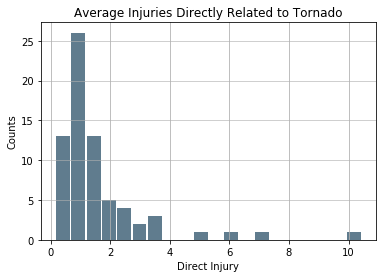

In [20]:
tornado.INJURIES_DIRECT.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Average Injuries Directly Related to Tornado')
plt.xlabel('Direct Injury')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

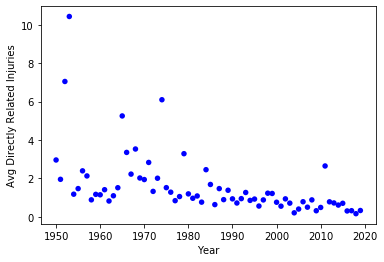

In [23]:
thinkplot.Scatter(tornado.YEAR, tornado.INJURIES_DIRECT, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg Directly Related Injuries',
                 legend=False)

It doesn't look like there is much changing with the data. It looks like it is spread pretty wid at the beginning ad then it clusters closer together. I will include it for now, but will most likely drop when runing my test. It just seems like the line is pretty flat. 

In [24]:
tornado['INJURIES_INDIRECT'] = (t_df.groupby('YEAR',as_index = False).agg({"INJURIES_INDIRECT": "mean"})).INJURIES_INDIRECT

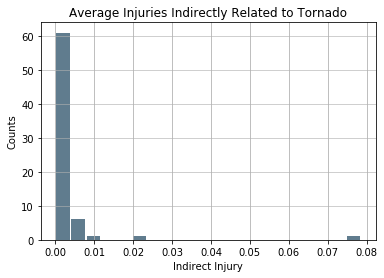

In [25]:
tornado.INJURIES_INDIRECT.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Average Injuries Indirectly Related to Tornado')
plt.xlabel('Indirect Injury')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

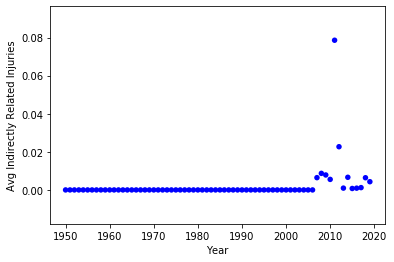

In [26]:
thinkplot.Scatter(tornado.YEAR, tornado.INJURIES_INDIRECT, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg Indirectly Related Injuries',
                 legend=False)

Looks like this is a new type of variable that was added, I am going to drop, cause I am not entirely show that it would be helpful in my final analysis.  

In [27]:
tornado['DEATHS_DIRECT'] = (t_df.groupby('YEAR',as_index = False).agg({"DEATHS_DIRECT": "mean"})).DEATHS_DIRECT

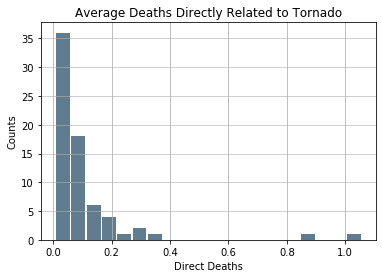

In [28]:
tornado.DEATHS_DIRECT.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Average Deaths Directly Related to Tornado')
plt.xlabel('Direct Deaths')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

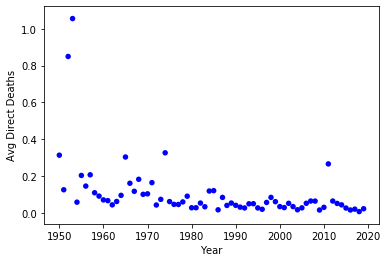

In [29]:
thinkplot.Scatter(tornado.YEAR, tornado.DEATHS_DIRECT, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg Direct Deaths',
                 legend=False)

This scatter plot looks similar to the injuries, the tail looks pretty spread out with some outliers. I will probably drop these values later, but for now I will leave them to see what the result brings us. 

In [30]:
tornado['DEATHS_INDIRECT'] = (t_df.groupby('YEAR',as_index = False).agg({"DEATHS_INDIRECT": "mean"})).DEATHS_INDIRECT

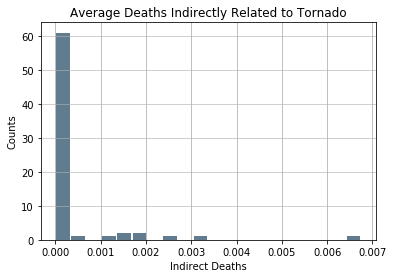

In [31]:
tornado.DEATHS_INDIRECT.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Average Deaths Indirectly Related to Tornado')
plt.xlabel('Indirect Deaths')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

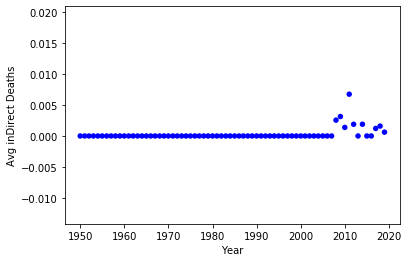

In [32]:
thinkplot.Scatter(tornado.YEAR, tornado.DEATHS_INDIRECT, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg inDirect Deaths',
                 legend=False)

DAMAGE_crops is up next, notice that they are listed with K's, M's and there is a B's. I will first show the values than transform them and aggregate it by year. 

In [34]:
t_df.DAMAGE_CROPS.value_counts()

0           33979
0.00K       14528
0            4582
0K            333
5K            163
5.00K         127
10.00K        120
50K           101
10K            89
1K             88
2.00K          83
1.00K          76
2K             72
100.00K        71
50.00K         51
.5K            51
100K           43
20K            42
20.00K         40
15K            36
25K            33
500.00K        33
500K           30
.05K           29
25.00K         28
200.00K        27
250.00K        27
3.00K          26
3K             25
30K            22
15.00K         22
4.00K          22
1M             19
150.00K        19
0.50K          17
30.00K         15
300.00K        15
75K            15
0M             14
4K             14
250K           13
200K           13
75.00K         11
0.10K           9
400.00K         9
.1K             8
2.00M           8
40.00K          8
40K             8
150K            7
7.00K           7
700.00K         7
400K            7
12.00K          6
2M              6
1.00M     

In [35]:
t_df.DAMAGE_CROPS_t  = (t_df.DAMAGE_CROPS.replace(r'[KMB]+$', '', regex=True).astype(float) * t_df.DAMAGE_CROPS.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6,10**9]).astype(int))

C:\Users\alero\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [36]:
t_df.DAMAGE_CROPS_t.value_counts()

0.0           53437
5000.0          290
10000.0         211
1000.0          164
2000.0          155
50000.0         152
100000.0        120
20000.0          83
500.0            70
500000.0         68
25000.0          61
15000.0          58
3000.0           51
250000.0         41
200000.0         40
30000.0          37
4000.0           36
50.0             29
150000.0         27
1000000.0        26
75000.0          26
300000.0         23
100.0            17
400000.0         17
40000.0          16
2000000.0        14
700000.0         10
12000.0          10
8000.0            9
60000.0           8
1500.0            7
80000.0           7
7000.0            7
6000.0            7
200.0             7
800000.0          6
600000.0          6
35000.0           6
3000000.0         5
350000.0          4
70000.0           4
5000000.0         4
4000000.0         4
2200000.0         3
3500.0            3
750000.0          3
45000.0           3
140000.0          3
11000.0           2
1500000.0         2


In [37]:
t_df[t_df.DAMAGE_CROPS_t==0].YEAR.value_counts().sort_index()

1950     223
1951     269
1952     272
1953     492
1954     609
1955     632
1956     567
1957     930
1958     608
1959     630
1960     645
1961     772
1962     673
1963     493
1964     760
1965     990
1966     606
1967     966
1968     715
1969     650
1970     700
1971     963
1972     776
1973    1198
1974    1120
1975     962
1976     935
1977     922
1978     875
1979     918
1980     972
1981     830
1982    1180
1983     995
1984    1020
1985     773
1986     849
1987     695
1988     773
1989     921
1990    1264
1991    1208
1992    1404
1993     553
1994     830
1995    1150
1996     104
1997     186
1998     201
1999     129
2000     149
2001     162
2002     103
2003     178
2004     191
2005     121
2006     265
2007    1043
2008    1643
2009    1025
2010    1142
2011    1693
2012     771
2013     860
2014     752
2015    1080
2016     861
2017    1236
2018     962
2019    1292
Name: YEAR, dtype: int64

In [38]:
t_df[t_df.DAMAGE_CROPS.isna()].YEAR.value_counts().sort_index()

1996    1093
1997     936
1998    1189
1999    1347
2000     966
2001    1128
2002     899
2003    1303
2004    1626
2005    1111
2006     958
2007     141
2008     174
2009     172
2010     222
2011     276
2012     257
2013     113
2014     187
2015     183
2016     184
2017     331
2018     236
2019     256
Name: YEAR, dtype: int64

I am going to set the values as zero, assuming that the data was just not entered. 

In [39]:
t_df["DAMAGE_CROPS"].fillna("0", inplace = True)
t_df["DAMAGE_CROPS_t"]  = (t_df.DAMAGE_CROPS.replace(r'[KMB]+$', '', regex=True).astype(float) * t_df.DAMAGE_CROPS.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6,10**9]).astype(int))

In [40]:
t_df.DAMAGE_CROPS_t.value_counts()

0.0           53437
5000.0          290
10000.0         211
1000.0          164
2000.0          155
50000.0         152
100000.0        120
20000.0          83
500.0            70
500000.0         68
25000.0          61
15000.0          58
3000.0           51
250000.0         41
200000.0         40
30000.0          37
4000.0           36
50.0             29
150000.0         27
1000000.0        26
75000.0          26
300000.0         23
100.0            17
400000.0         17
40000.0          16
2000000.0        14
700000.0         10
12000.0          10
8000.0            9
60000.0           8
1500.0            7
80000.0           7
7000.0            7
6000.0            7
200.0             7
800000.0          6
600000.0          6
35000.0           6
3000000.0         5
350000.0          4
70000.0           4
5000000.0         4
4000000.0         4
2200000.0         3
3500.0            3
750000.0          3
45000.0           3
140000.0          3
11000.0           2
1500000.0         2


In [41]:
t_df[t_df.DAMAGE_CROPS_t.isna()].YEAR.value_counts().sort_index()

1996    1093
1997     936
1998    1189
1999    1347
2000     966
2001    1128
2002     899
2003    1303
2004    1626
2005    1111
2006     958
2007     141
2008     174
2009     172
2010     222
2011     276
2012     257
2013     113
2014     187
2015     183
2016     184
2017     331
2018     236
2019     256
Name: YEAR, dtype: int64

In [42]:
tornado['DAMAGE_CROPS'] = (t_df.groupby('YEAR',as_index = False).agg({"DAMAGE_CROPS_t": "mean"})).DAMAGE_CROPS_t

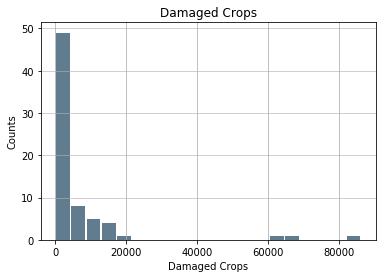

In [43]:
tornado.DAMAGE_CROPS.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Damaged Crops')
plt.xlabel('Damaged Crops')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

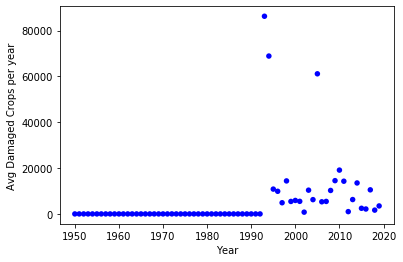

In [44]:
thinkplot.Scatter(tornado.YEAR, tornado.DAMAGE_CROPS, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg Damaged Crops per year',
                 legend=False)

I am going to do the same thing with damaged property as I did with crops. 

In [45]:
t_df["DAMAGE_PROPERTY"].fillna("0", inplace = True)
t_df["DAMAGE_PROPERTY"]  = t_df["DAMAGE_PROPERTY"].astype(str)

In [46]:
t_df["DAMAGE_PROPERTY_t"] = (pd.to_numeric(t_df.DAMAGE_PROPERTY.replace(r'[KMB]+$', '', regex=True),errors='coerce').fillna(0) * t_df.DAMAGE_PROPERTY.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6,10**9]).astype(int))

In [47]:
t_df.isna().sum()

YEAR                    0
INJURIES_DIRECT         0
INJURIES_INDIRECT       0
DEATHS_DIRECT           0
DEATHS_INDIRECT         0
DAMAGE_PROPERTY         0
DAMAGE_CROPS            0
TOR_F_SCALE          1970
TOR_LENGTH             28
TOR_WIDTH              28
DAMAGE_CROPS_t          0
DAMAGE_PROPERTY_t       0
dtype: int64

In [48]:
tornado['DAMAGE_PROPERTY'] = (t_df.groupby('YEAR',as_index = False).agg({"DAMAGE_PROPERTY_t": "mean"})).DAMAGE_PROPERTY_t

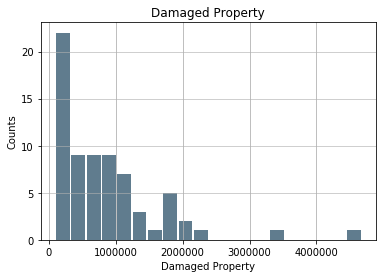

In [49]:
tornado.DAMAGE_PROPERTY.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Damaged Property')
plt.xlabel('Damaged Property')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

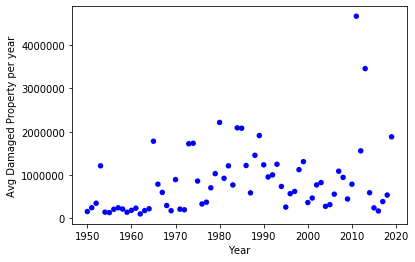

In [50]:
thinkplot.Scatter(tornado.YEAR, tornado.DAMAGE_PROPERTY, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg Damaged Property per year',
                 legend=False)

Damage property might look like it is moving up, but not a ton, it appears pretty flat, with possibly a few outliers.

Onto TOR_F_SCALE  we need to figure out what to do with the EFU and the missing values. 

F_scale relates to the storm rating for tornadoes. Where F0 is mild to F5 is terrible. I want to see when the naming changed from F to EF. I know there are some missing values as well. It looks like EFU relates to missing or unidentified. So we check when that changed as well. I will make the values similar so that we can update appropriately. 

In [51]:
t_df.loc[(t_df.TOR_F_SCALE.isna() ),'TOR_F_SCALE']= 'NA'

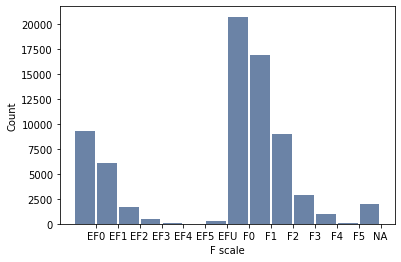

In [52]:
hist = thinkstats2.Hist(t_df.TOR_F_SCALE, label='Fujita Scale')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='F scale', ylabel='Count')

In [53]:
(t_df.query('TOR_F_SCALE.str.contains("EFU") or TOR_F_SCALE.str.contains("NA") ', engine = 'python')).groupby(["YEAR", "TOR_F_SCALE"]).size()

YEAR  TOR_F_SCALE
1950  NA               6
1951  NA              39
1952  NA              12
1953  NA              37
1954  NA              40
1955  NA              76
1956  NA              45
1957  NA              93
1958  NA              83
1959  NA              74
1960  NA              70
1961  NA              70
1962  NA              66
1963  NA              34
1964  NA              82
1965  NA             120
1966  NA              84
1967  NA             144
1968  NA              53
1969  NA              59
1970  NA              77
1971  NA              11
1972  NA               2
1974  NA               9
1975  NA               6
1976  NA              48
1977  NA             181
1978  NA             203
1979  NA              38
1980  NA              24
1982  NA               1
1993  NA               3
1994  NA              11
1995  NA              69
2016  EFU             31
2017  EFU             67
2018  EFU             18
2019  EFU            182
dtype: int64

It appears that these are missing the EFU values or unidentified. Since the f_scale is catagorical data I am going to drop the missing values and transpose the the column to 5 new columns that have the total number of category 1, 2, 3, 4, and 5 values. To do this I will need to update the naming conventions so they are all EF accross the board.

In [54]:
t_df.loc[(t_df.TOR_F_SCALE == 'F0'),'TOR_F_SCALE']= 'EF0'
t_df.loc[(t_df.TOR_F_SCALE == 'F1'),'TOR_F_SCALE']= 'EF1'
t_df.loc[(t_df.TOR_F_SCALE == 'F2'),'TOR_F_SCALE']= 'EF2'
t_df.loc[(t_df.TOR_F_SCALE == 'F3'),'TOR_F_SCALE']= 'EF3'
t_df.loc[(t_df.TOR_F_SCALE == 'F4'),'TOR_F_SCALE']= 'EF4'
t_df.loc[(t_df.TOR_F_SCALE == 'F5'),'TOR_F_SCALE']= 'EF5'

In [55]:
t_df2 = t_df[t_df["TOR_F_SCALE"].isin(["EF0","EF1","EF2","EF3","EF4","EF5"])]

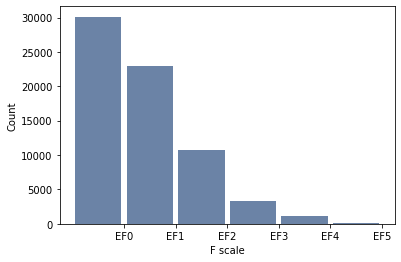

In [56]:
hist = thinkstats2.Hist(t_df2.TOR_F_SCALE, label='Fujita Scale')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='F scale', ylabel='Count')

In [57]:
f_s = (t_df2[["YEAR", "TOR_F_SCALE"]].pivot_table(index='YEAR',columns='TOR_F_SCALE',aggfunc='size', fill_value=0))

In [58]:
f_s.reset_index(inplace=True)
tornado[["EF0","EF1","EF2","EF3","EF4","EF5"]] = f_s[["EF0","EF1","EF2","EF3","EF4","EF5"]]

In [59]:
tornado.head()

,YEAR,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_CROPS,DAMAGE_PROPERTY,EF0,EF1,EF2,EF3,EF4,EF5
0,1950,2.955157,0.0,0.313901,0.0,0.0,1.546262e+05,13,84,75,33,12,0
1,1951,1.947955,0.0,0.126394,0.0,0.0,2.435167e+05,25,88,84,26,7,0
2,1952,7.044118,0.0,0.849265,0.0,0.0,3.466994e+05,26,84,81,43,26,0
3,1953,10.428862,0.0,1.054878,0.0,0.0,1.211595e+06,49,146,154,59,39,8
4,1954,1.174056,0.0,0.059113,0.0,0.0,1.408954e+05,72,210,214,57,16,0


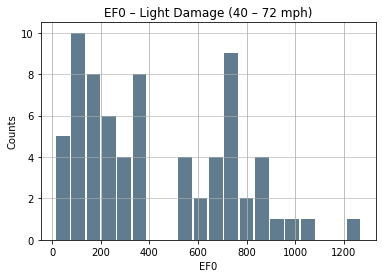

In [60]:
tornado.EF0.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF0 – Light Damage (40 – 72 mph)')
plt.xlabel('EF0')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

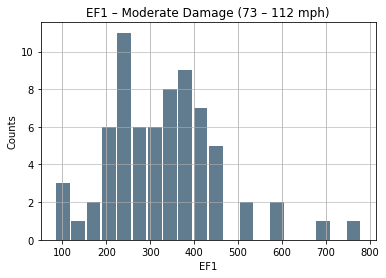

In [61]:
tornado.EF1.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF1 – Moderate Damage (73 – 112 mph)')
plt.xlabel('EF1')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

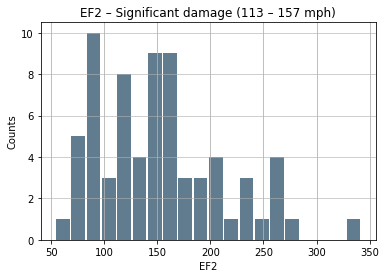

In [62]:
tornado.EF2.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF2 – Significant damage (113 – 157 mph)')
plt.xlabel('EF2')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

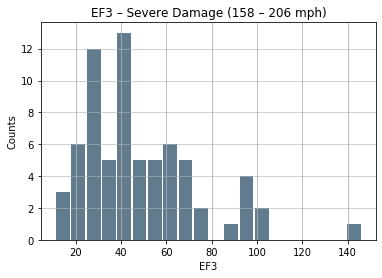

In [63]:
tornado.EF3.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF3 – Severe Damage (158 – 206 mph)')
plt.xlabel('EF3')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

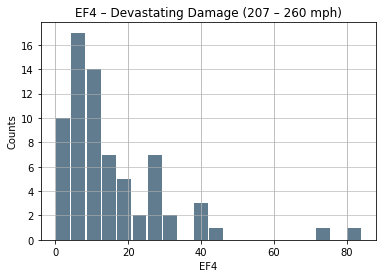

In [64]:
tornado.EF4.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF4 – Devastating Damage (207 – 260 mph)')
plt.xlabel('EF4')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

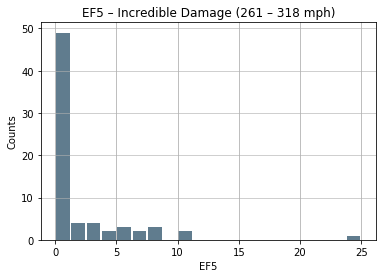

In [65]:
tornado.EF5.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF5 – Incredible Damage (261 – 318 mph)')
plt.xlabel('EF5')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

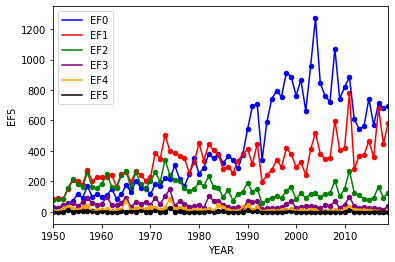

In [66]:
ax = plt.gca()
tornado.plot(kind='line',x='YEAR',y='EF0', color='blue',ax=ax)
tornado.plot(kind='line',x='YEAR',y='EF1', color='red', ax=ax)
tornado.plot(kind='line',x='YEAR',y='EF2', color='green', ax=ax)
tornado.plot(kind='line',x='YEAR',y='EF3', color='purple', ax=ax)
tornado.plot(kind='line',x='YEAR',y='EF4', color='orange', ax=ax)
tornado.plot(kind='line',x='YEAR',y='EF5', color='black', ax=ax)
tornado.plot(kind='scatter',x='YEAR',y='EF0', color='blue',ax=ax)
tornado.plot(kind='scatter',x='YEAR',y='EF1', color='red', ax=ax)
tornado.plot(kind='scatter',x='YEAR',y='EF2', color='green', ax=ax)
tornado.plot(kind='scatter',x='YEAR',y='EF3', color='purple', ax=ax)
tornado.plot(kind='scatter',x='YEAR',y='EF4', color='orange', ax=ax)
tornado.plot(kind='scatter',x='YEAR',y='EF5', color='black', ax=ax)
plt.show()

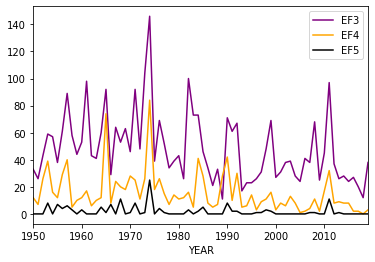

In [67]:
ax = plt.gca()
tornado.plot(kind='line',x='YEAR',y='EF3', color='purple', ax=ax)
tornado.plot(kind='line',x='YEAR',y='EF4', color='orange', ax=ax)
tornado.plot(kind='line',x='YEAR',y='EF5', color='black', ax=ax)
plt.show()

Looking at the historgrams they all kind look like they have an outlier, but looking at the sccatterplots it looks like they all jump together so, I am not sure that getting rid of the outliers makes much sense. 

Lets look at lenght and width. I need to see if we still have missing values, we might dropped those when I dropped the EFU and missing values for tor_f_scale. 

In [68]:
t_df2.isna().sum()

YEAR                  0
INJURIES_DIRECT       0
INJURIES_INDIRECT     0
DEATHS_DIRECT         0
DEATHS_INDIRECT       0
DAMAGE_PROPERTY       0
DAMAGE_CROPS          0
TOR_F_SCALE           0
TOR_LENGTH           28
TOR_WIDTH            28
DAMAGE_CROPS_t        0
DAMAGE_PROPERTY_t     0
dtype: int64

Since there are so few missing I am going to drop the missing values. 

In [69]:
t_df2 = t_df2.dropna()

In [70]:
t_df2.isna().sum()

YEAR                 0
INJURIES_DIRECT      0
INJURIES_INDIRECT    0
DEATHS_DIRECT        0
DEATHS_INDIRECT      0
DAMAGE_PROPERTY      0
DAMAGE_CROPS         0
TOR_F_SCALE          0
TOR_LENGTH           0
TOR_WIDTH            0
DAMAGE_CROPS_t       0
DAMAGE_PROPERTY_t    0
dtype: int64

In [71]:
tornado['TOR_LENGTH'] = (t_df.groupby('YEAR',as_index = False).agg({"TOR_LENGTH": "mean"})).TOR_LENGTH
tornado['TOR_WIDTH'] = (t_df.groupby('YEAR',as_index = False).agg({"TOR_WIDTH": "mean"})).TOR_WIDTH

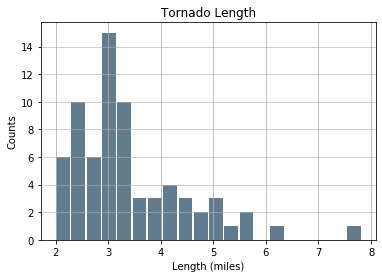

In [72]:
tornado.TOR_LENGTH.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Tornado Length')
plt.xlabel('Length (miles)')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

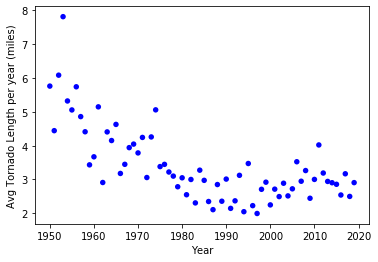

In [73]:
thinkplot.Scatter(tornado.YEAR, tornado.TOR_LENGTH, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg Tornado Length per year (miles)',
                 legend=False)

It looks like the the tornado length has decreased over time. There may be one outlier in the mix, but I am going to proceed forward for now. 

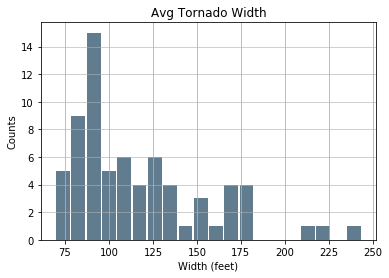

In [74]:
tornado.TOR_WIDTH.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Avg Tornado Width')
plt.xlabel('Width (feet)')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

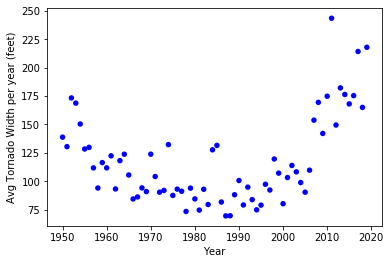

In [75]:
thinkplot.Scatter(tornado.YEAR, tornado.TOR_WIDTH, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg Tornado Width per year (feet)',
                 legend=False)

The width almost looks like a parabola, it appears as thought it decreased from 1950 to about 1980 and has been increasing quickly. 

In [76]:
tornado.describe()

,YEAR,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_CROPS,DAMAGE_PROPERTY,EF0,EF1,EF2,EF3,EF4,EF5,TOR_LENGTH,TOR_WIDTH
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1984.500000,1.586791,0.002157,0.105623,0.000301,5718.961550,8.492388e+05,430.214286,328.714286,153.342857,48.314286,15.785714,1.971429,3.420354,117.441502
std,20.351085,1.662181,0.009841,0.163520,0.001001,15045.483374,8.004488e+05,311.031472,128.736012,59.919484,25.561261,15.089004,3.926762,1.105980,38.394459
min,1950.000000,0.159200,0.000000,0.008000,0.000000,0.000000,9.985250e+04,13.000000,84.000000,54.000000,11.000000,0.000000,0.000000,1.993898,69.523741
25%,1967.250000,0.755818,0.000000,0.034396,0.000000,0.000000,2.470710e+05,160.250000,241.500000,103.250000,28.250000,7.000000,0.000000,2.716227,90.527618
50%,1984.500000,1.086317,0.000000,0.058370,0.000000,0.000000,6.082973e+05,347.000000,330.500000,151.000000,42.000000,11.000000,0.000000,3.078563,106.352787
75%,2001.750000,1.871902,0.000000,0.103599,0.000000,5448.634113,1.188974e+06,710.750000,395.750000,188.000000,61.000000,19.500000,2.000000,4.001297,132.083105
max,2019.000000,10.428862,0.078592,1.054878,0.006750,86248.051948,4.669311e+06,1271.000000,780.000000,342.000000,146.000000,84.000000,25.000000,7.815244,243.468645


In [77]:
tornado.mode()

,YEAR,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_CROPS,DAMAGE_PROPERTY,EF0,EF1,EF2,EF3,EF4,EF5,TOR_LENGTH,TOR_WIDTH
0,1950,0.159200,0.0,0.008000,0.0,0.0,9.985250e+04,115.0,229.0,154.0,26.0,8.0,0.0,1.993898,69.523741
1,1951,0.203390,NaN,0.016496,NaN,NaN,1.307921e+05,167.0,NaN,NaN,38.0,NaN,NaN,2.047149,69.671410
2,1952,0.301205,NaN,0.016682,NaN,NaN,1.388143e+05,742.0,NaN,NaN,NaN,NaN,NaN,2.107050,73.434286
3,1953,0.311862,NaN,0.017668,NaN,NaN,1.408954e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.145447,74.624096
4,1954,0.314511,NaN,0.017976,NaN,NaN,1.546262e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.225666,74.876452
5,1955,0.323874,NaN,0.020521,NaN,NaN,1.679112e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.248161,79.010682
6,1956,0.399851,NaN,0.021251,NaN,NaN,1.742680e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.306834,79.152318
7,1957,0.483402,NaN,0.023442,NaN,NaN,1.769383e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.348174,79.557789
8,1958,0.497180,NaN,0.027273,NaN,NaN,1.832934e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.356569,80.240547
9,1959,0.549963,NaN,0.027778,NaN,NaN,1.952090e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.368234,81.742049


In [78]:
tornado.skew()

YEAR                 0.000000
INJURIES_DIRECT      3.208336
INJURIES_INDIRECT    7.128179
DEATHS_DIRECT        4.392291
DEATHS_INDIRECT      4.660297
DAMAGE_CROPS         4.123353
DAMAGE_PROPERTY      2.281136
EF0                  0.524359
EF1                  0.833408
EF2                  0.741709
EF3                  1.282844
EF4                  2.407241
EF5                  3.553839
TOR_LENGTH           1.479018
TOR_WIDTH            1.180905
dtype: float64

In [79]:
tornado.kurtosis()

YEAR                 -1.200000
INJURIES_DIRECT      12.744316
INJURIES_INDIRECT    54.704729
DEATHS_DIRECT        21.754762
DEATHS_INDIRECT      25.823154
DAMAGE_CROPS         17.691905
DAMAGE_PROPERTY       7.520982
EF0                  -0.803068
EF1                   1.781413
EF2                   0.273234
EF3                   2.101752
EF4                   7.658290
EF5                  16.869668
TOR_LENGTH            2.767117
TOR_WIDTH             1.061118
dtype: float64

Since Injuries, and Death seem fairly flat and similar and they are obviously skewed, I am going to drop those to reduce the noies. I am also going to drop damage crop because it has not been reported over time. For Damaged property, when looking at the histogram and scatterplot, it looks like values over 3M are the outliers. EF5 seems to have an outlier as well the value of above 20.

In [80]:
tornado2 = tornado[['YEAR', 'DAMAGE_PROPERTY',"EF0","EF1","EF2","EF3","EF4","EF5", 'TOR_LENGTH', 'TOR_WIDTH']]
tornado2 = tornado2[tornado2.DAMAGE_PROPERTY <3000000]
tornado2 = tornado2[tornado2.EF5 < 20]

displays for powerpoint

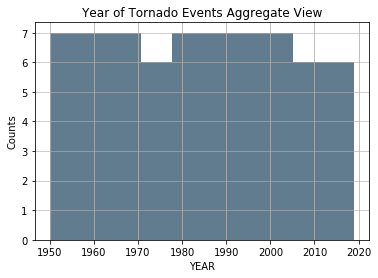

In [81]:
tornado2.YEAR.plot.hist(grid=True, color='#607c8e')
plt.title('Year of Tornado Events Aggregate View')
plt.xlabel('YEAR')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

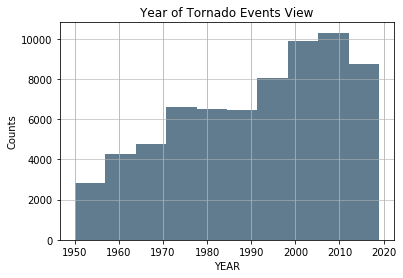

In [82]:
t_df2.YEAR.plot.hist(grid=True, color='#607c8e')
plt.title('Year of Tornado Events View')
plt.xlabel('YEAR')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [83]:
tornado2.YEAR.describe()

count      67.000000
mean     1983.835821
std        20.197207
min      1950.000000
25%      1966.500000
50%      1984.000000
75%      2000.500000
max      2019.000000
Name: YEAR, dtype: float64

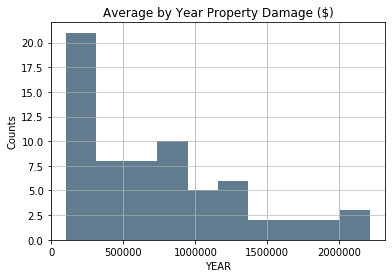

In [84]:
tornado2.DAMAGE_PROPERTY.plot.hist(grid=True, color='#607c8e')
plt.title('Average by Year Property Damage ($)')
plt.xlabel('YEAR')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [85]:
pd.options.display.float_format = '{:.2f}'.format
print(tornado2.DAMAGE_PROPERTY.describe())

count        67.00
mean     740082.16
std      567117.99
min       99852.50
25%      242397.53
50%      589639.81
75%     1058827.41
max     2214829.58
Name: DAMAGE_PROPERTY, dtype: float64


In [87]:
bins = [0,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000,2000000,2200000,2400000,2600000]
names = ['<= 200000','<= 400000','<= 600000','<= 800000','<= 1000000','<= 1200000','<= 1400000','<= 1600000','<= 1800000','<= 2000000','<= 2200000','<= 2400000','<= 2600000']

tornado2['Damage_Bucket'] = pd.cut(tornado2.DAMAGE_PROPERTY, bins, labels=names)

In [88]:
bins = [0,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000,2000000,2200000,2400000,2600000]
names = [1,2,3,4,5,6,7,8,9,10,11,12,13]

tornado2['Damage_Bucket_id'] = pd.cut(tornado2.DAMAGE_PROPERTY, bins, labels=names)

In [89]:
print(tornado2.Damage_Bucket_id.describe())

count     67
unique    12
top        2
freq      17
Name: Damage_Bucket_id, dtype: int64


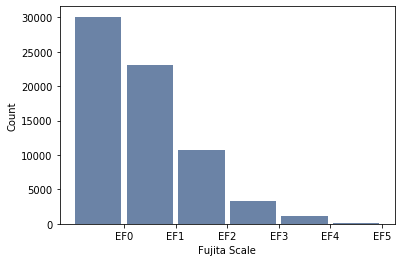

In [90]:
hist = thinkstats2.Hist(t_df2.TOR_F_SCALE, label='Fujita Scale')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Fujita Scale', ylabel='Count')

In [91]:
t_df2.TOR_F_SCALE.describe()

count     68456
unique        6
top         EF0
freq      30087
Name: TOR_F_SCALE, dtype: object

count     67.00
mean     424.93
std      311.62
min       13.00
25%      156.00
50%      343.00
75%      709.50
max     1271.00
Name: EF0, dtype: float64

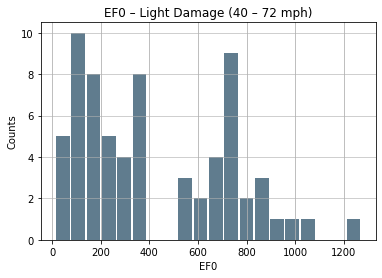

In [92]:
tornado2.EF0.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF0 – Light Damage (40 – 72 mph)')
plt.xlabel('EF0')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
tornado2.EF0.describe()

count    67.00
mean    320.37
std     118.63
min      84.00
25%     240.50
50%     324.00
75%     386.00
max     682.00
Name: EF1, dtype: float64

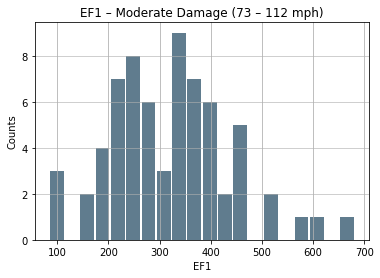

In [93]:
tornado2.EF1.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF1 – Moderate Damage (73 – 112 mph)')
plt.xlabel('EF1')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
tornado2.EF1.describe()

count    67.00
mean    151.00
std      58.27
min      54.00
25%     101.50
50%     151.00
75%     180.50
max     342.00
Name: EF2, dtype: float64

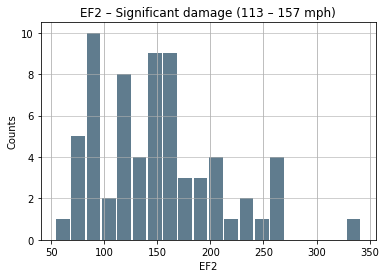

In [94]:
tornado2.EF2.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF2 – Significant damage (113 – 157 mph)')
plt.xlabel('EF2')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
tornado2.EF2.describe()

count    67.00
mean     46.46
std      22.17
min      11.00
25%      28.50
50%      41.00
75%      60.50
max     104.00
Name: EF3, dtype: float64

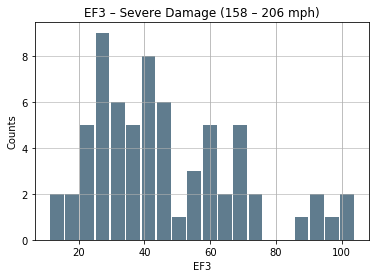

In [95]:
tornado2.EF3.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF3 – Severe Damage (158 – 206 mph)')
plt.xlabel('EF3')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
tornado2.EF3.describe()

count   67.00
mean    14.63
std     12.71
min      0.00
25%      6.50
50%     11.00
75%     18.00
max     74.00
Name: EF4, dtype: float64

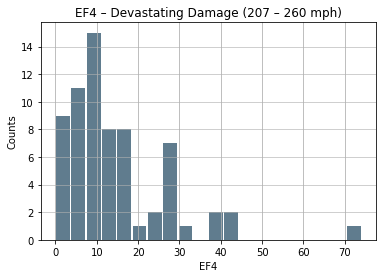

In [96]:
tornado2.EF4.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF4 – Devastating Damage (207 – 260 mph)')
plt.xlabel('EF4')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
tornado2.EF4.describe()

count   67.00
mean     1.51
std      2.57
min      0.00
25%      0.00
50%      0.00
75%      2.00
max     11.00
Name: EF5, dtype: float64

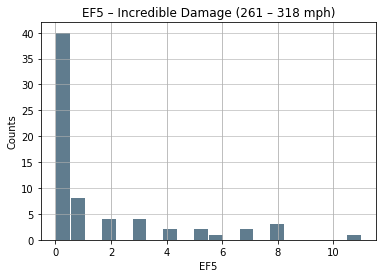

In [97]:
tornado2.EF5.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF5 – Incredible Damage (261 – 318 mph)')
plt.xlabel('EF5')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
tornado2.EF5.describe()

count   67.00
mean     3.39
std      1.11
min      1.99
25%      2.71
50%      3.06
75%      3.86
max      7.82
Name: TOR_LENGTH, dtype: float64

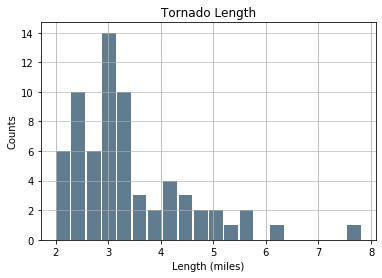

In [98]:
tornado2.TOR_LENGTH.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Tornado Length')
plt.xlabel('Length (miles)')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
tornado2.TOR_LENGTH.describe()

count    67.00
mean    114.37
std      34.99
min      69.52
25%      90.39
50%     104.18
75%     130.16
max     217.94
Name: TOR_WIDTH, dtype: float64

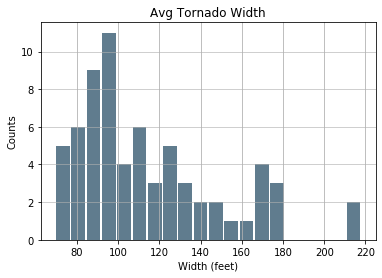

In [99]:
tornado2.TOR_WIDTH.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Avg Tornado Width')
plt.xlabel('Width (feet)')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
tornado2.TOR_WIDTH.describe()

In [100]:
DAMAGE_PROPERTY_2  = tornado2.DAMAGE_PROPERTY**2

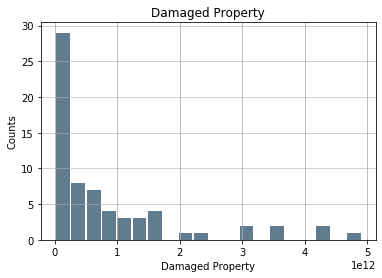

In [101]:
DAMAGE_PROPERTY_2.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Damaged Property')
plt.xlabel('Damaged Property')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)


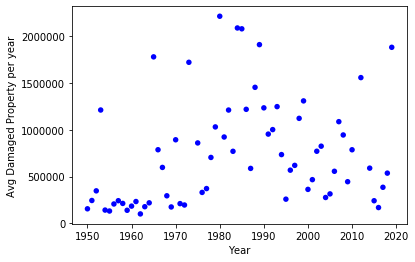

In [102]:

thinkplot.Scatter(tornado2.YEAR, tornado2.DAMAGE_PROPERTY, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg Damaged Property per year',
                 legend=False)

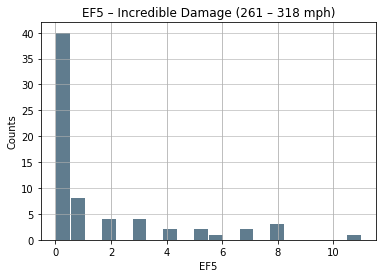

In [103]:
tornado2.EF5.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('EF5 – Incredible Damage (261 – 318 mph)')
plt.xlabel('EF5')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [104]:
tornado2.skew()

YEAR               0.02
DAMAGE_PROPERTY    0.96
EF0                0.55
EF1                0.47
EF2                0.80
EF3                0.83
EF4                2.06
EF5                1.92
TOR_LENGTH         1.56
TOR_WIDTH          1.08
Damage_Bucket_id   0.96
dtype: float64

In [105]:
tornado2.kurtosis()

YEAR               -1.17
DAMAGE_PROPERTY     0.09
EF0                -0.75
EF1                 0.64
EF2                 0.63
EF3                 0.16
EF4                 6.30
EF5                 3.03
TOR_LENGTH          3.07
TOR_WIDTH           0.61
Damage_Bucket_id    0.07
dtype: float64

EF4 still has some skewness but the kurtosis is below 10, so we will proceed for now. 

In [106]:
tornado2.describe()

,YEAR,DAMAGE_PROPERTY,EF0,EF1,EF2,EF3,EF4,EF5,TOR_LENGTH,TOR_WIDTH
count,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00
mean,1983.84,740082.16,424.93,320.37,151.00,46.46,14.63,1.51,3.39,114.37
std,20.20,567117.99,311.62,118.63,58.27,22.17,12.71,2.57,1.11,34.99
min,1950.00,99852.50,13.00,84.00,54.00,11.00,0.00,0.00,1.99,69.52
25%,1966.50,242397.53,156.00,240.50,101.50,28.50,6.50,0.00,2.71,90.39
50%,1984.00,589639.81,343.00,324.00,151.00,41.00,11.00,0.00,3.06,104.18
75%,2000.50,1058827.41,709.50,386.00,180.50,60.50,18.00,2.00,3.86,130.16
max,2019.00,2214829.58,1271.00,682.00,342.00,104.00,74.00,11.00,7.82,217.94


In [107]:
tornado2.mode()

,YEAR,DAMAGE_PROPERTY,EF0,EF1,EF2,EF3,EF4,EF5,TOR_LENGTH,TOR_WIDTH,Damage_Bucket,Damage_Bucket_id
0,1950,99852.50,115.00,229.00,154.00,38.00,8.00,0.00,1.99,69.52,<= 400000,2
1,1951,130792.14,167.00,nan,nan,nan,nan,nan,2.05,69.67,NaN,NaN
2,1952,138814.35,742.00,nan,nan,nan,nan,nan,2.11,73.43,NaN,NaN
3,1953,140895.44,nan,nan,nan,nan,nan,nan,2.15,74.62,NaN,NaN
4,1954,154626.23,nan,nan,nan,nan,nan,nan,2.23,74.88,NaN,NaN
5,1955,167911.21,nan,nan,nan,nan,nan,nan,2.25,79.01,NaN,NaN
6,1956,174268.05,nan,nan,nan,nan,nan,nan,2.31,79.15,NaN,NaN
7,1957,176938.30,nan,nan,nan,nan,nan,nan,2.35,79.56,NaN,NaN
8,1958,183293.40,nan,nan,nan,nan,nan,nan,2.36,80.24,NaN,NaN
9,1959,195208.96,nan,nan,nan,nan,nan,nan,2.37,81.74,NaN,NaN


pmf

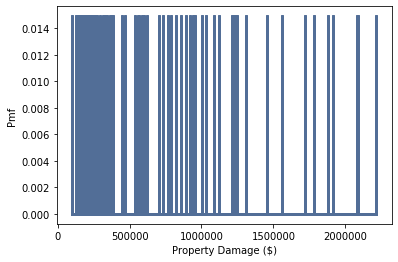

In [108]:
pmf = thinkstats2.Pmf(tornado2.DAMAGE_PROPERTY, label='Damage')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Property Damage ($)', ylabel='Pmf')

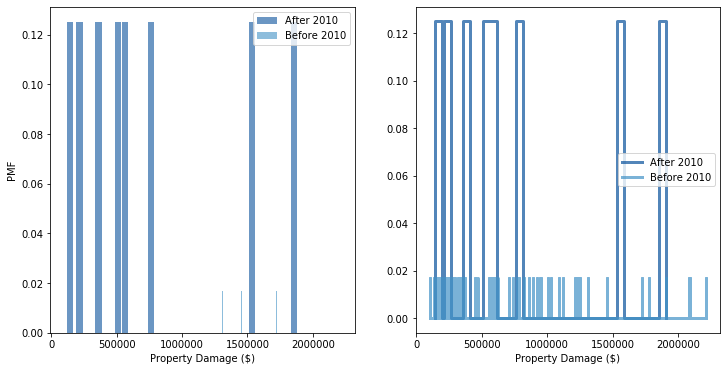

In [110]:
decade_2010_after = tornado2[tornado2.YEAR >= 2010]
decade_2010_before = tornado2[tornado2.YEAR < 2010]
_2010_aft_pmf_1 = thinkstats2.Pmf(decade_2010_after.DAMAGE_PROPERTY, label='After 2010')
_2010_bef_pmf_1 = thinkstats2.Pmf(decade_2010_before.DAMAGE_PROPERTY, label='Before 2010')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(_2010_aft_pmf_1, align='right')
thinkplot.Hist(_2010_bef_pmf_1, align='left')
thinkplot.Config(xlabel='Property Damage ($)', ylabel='PMF',legend = True)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([_2010_aft_pmf_1, _2010_bef_pmf_1])
thinkplot.Config(xlabel='Property Damage ($)')

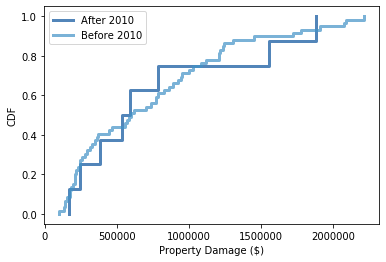

In [111]:
_2010_aft_cdf_1 = thinkstats2.Cdf(decade_2010_after.DAMAGE_PROPERTY, label='After 2010')
_2010_bef_cdf_1 = thinkstats2.Cdf(decade_2010_before.DAMAGE_PROPERTY, label='Before 2010')

thinkplot.PrePlot(2)
thinkplot.Cdfs([_2010_aft_cdf_1, _2010_bef_cdf_1])
thinkplot.Config(xlabel='Property Damage ($)', ylabel='CDF')

The distribution just seems off. I am going to try to bucket them to make more sense of what is actually happneing. 

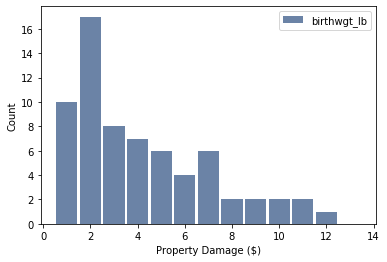

In [112]:
hist = thinkstats2.Hist(tornado2.Damage_Bucket_id, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Property Damage ($)', ylabel='Count')

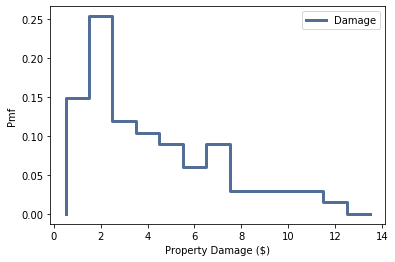

In [113]:
pmf = thinkstats2.Pmf(tornado2.Damage_Bucket_id, label='Damage')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Property Damage ($)', ylabel='Pmf')

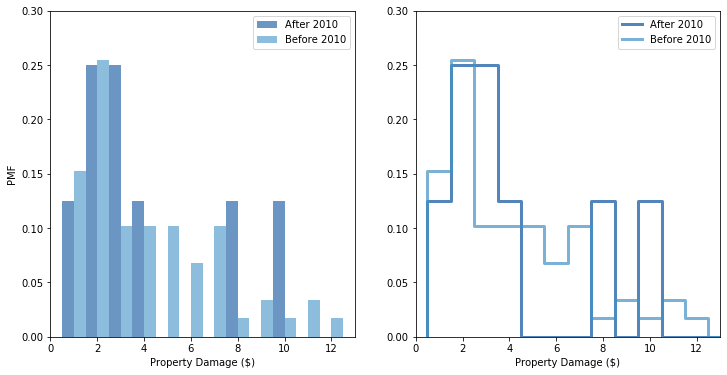

In [114]:
decade_2010_after = tornado2[tornado2.YEAR >= 2010]
decade_2010_before = tornado2[tornado2.YEAR < 2010]
_2010_aft_pmf = thinkstats2.Pmf(decade_2010_after.Damage_Bucket_id, label='After 2010')
_2010_bef_pmf = thinkstats2.Pmf(decade_2010_before.Damage_Bucket_id, label='Before 2010')

width=0.5
axis = [0, 13, 0, 0.3]

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(_2010_aft_pmf, align='right', width=width)
thinkplot.Hist(_2010_bef_pmf, align='left', width=width)
thinkplot.Config(xlabel='Property Damage ($)', ylabel='PMF', axis= axis, legend = True)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([_2010_aft_pmf, _2010_bef_pmf])
thinkplot.Config(xlabel='Property Damage ($)',axis= axis)

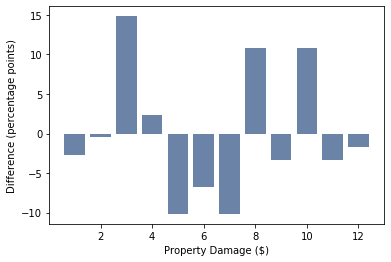

In [115]:
bucket = range(1, 13)
diffs = []
for i in bucket:
    p1 = _2010_aft_pmf.Prob(i)
    p2 = _2010_bef_pmf.Prob(i)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(bucket, diffs)
thinkplot.Config(xlabel='Property Damage ($)', ylabel='Difference (percentage points)')

I can tell if the values are different at all. The pmf's seem fairly similar. 

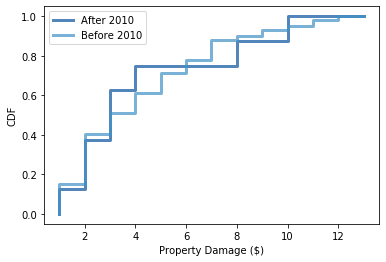

In [116]:
_2010_aft_cdf = thinkstats2.Cdf(decade_2010_after.Damage_Bucket_id, label='After 2010')
_2010_bef_cdf = thinkstats2.Cdf(decade_2010_before.Damage_Bucket_id, label='Before 2010')

thinkplot.PrePlot(2)
thinkplot.Cdfs([_2010_aft_cdf, _2010_bef_cdf])
thinkplot.Config(xlabel='Property Damage ($)', ylabel='CDF')

Looking at the CDF for damage property both bucketed and non bucketed it looks like they are fairly similar. They might be a little off, but the rise consistently together.

For analytic distribution, I went ahead and used DAMAGE_PROPERTY, since it appeared to be Exopnential. It appears to fit as well. The CCDF with log y scale seems to follows with a straight line. 

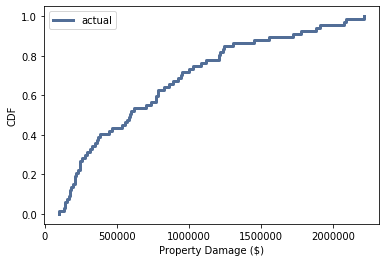

In [117]:
cdf = thinkstats2.Cdf(tornado2.DAMAGE_PROPERTY, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Property Damage ($)', ylabel='CDF')

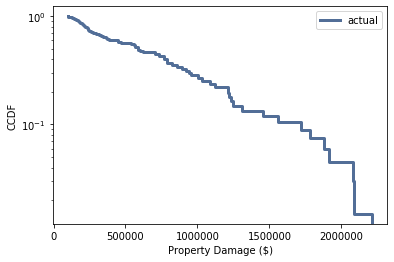

In [118]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Property Damage ($)',
                 ylabel='CCDF', yscale='log', loc='upper right')

For correlation and scatterplots I took year and tornado length. I looked at it the mean of length over year f as well as the raw variables to see if they are similar.  

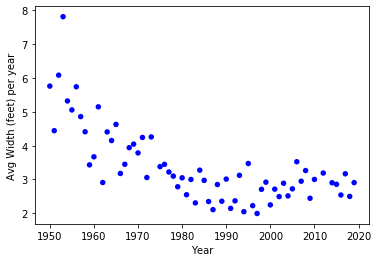

In [119]:
thinkplot.Scatter(tornado2.YEAR, tornado2.TOR_LENGTH, alpha=1)
thinkplot.Config(xlabel='Year',
                 ylabel='Avg Width (feet) per year',
                 legend=False)

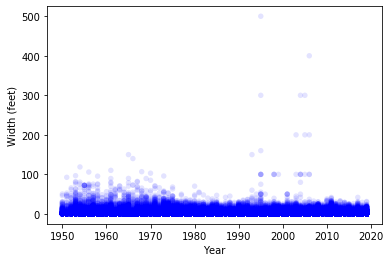

In [120]:
thinkplot.Scatter(t_df2.YEAR, t_df2.TOR_LENGTH, alpha=.11)
thinkplot.Config(xlabel='Year',
                 ylabel='Width (feet)',
                 legend=False)

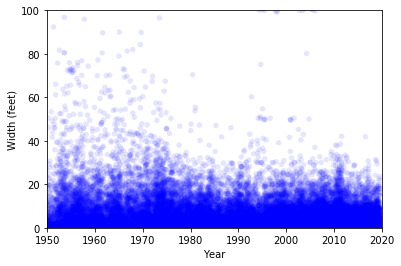

In [121]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
_year = Jitter(t_df2.YEAR)
_length = Jitter(t_df2.TOR_LENGTH)


thinkplot.Scatter(_year, _length, alpha=.1)
thinkplot.Config(xlabel='Year',
                 ylabel='Width (feet)',
                 axis= [1950,2020,0,100],
                 legend=False)

I zoomed in on the third graph to see what was actually happening as we made it closer. It looks like based on the averages and the the zoomed in jittered plot that the lengths may be shortening over the years. Lets check the correlation now. I run correlation for the aggregrate first then the raw next.

In [122]:
np.corrcoef(tornado2.YEAR, tornado2.TOR_LENGTH)

array([[ 1.        , -0.70892305],
       [-0.70892305,  1.        ]])

In [123]:
np.corrcoef(t_df2.YEAR, t_df2.TOR_LENGTH)

array([[ 1.        , -0.08890348],
       [-0.08890348,  1.        ]])

In [124]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [125]:
SpearmanCorr(tornado2.YEAR, tornado2.TOR_LENGTH)

-0.698699018277596

In [126]:
SpearmanCorr(t_df2.YEAR, t_df2.TOR_LENGTH)

0.10193580487255906

In [127]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [128]:
Corr(tornado2.YEAR, np.log(tornado2.TOR_LENGTH))

-0.7125315901211206

In [129]:
Corr(t_df2.YEAR, np.log(t_df2.TOR_LENGTH+1))

-0.008008888815100956

It seems that the correlations (pearsons, spearmen and non linear) is at ~-0.7, indicating a strong negative relationship between the varibles. Meaning that as time goes on the length of tornadoes are likely to decrease based on the sample.  

After each correlation I calculate the raw data corelation. Notice how it is significantly smaller. Spearman is positive and the others are negative. 

Now we will run a test, to see if the mean property damage prior to 2010 equals the mean property damage for tornadoes after 2010. 

$$H_{0}: \mu_{0} = \mu_{1}$$
$$H_{A}: \mu_{0} \neq \mu_{1}$$

In [130]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()
        
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [131]:
data = decade_2010_after.DAMAGE_PROPERTY.values, decade_2010_after.DAMAGE_PROPERTY.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

1.0

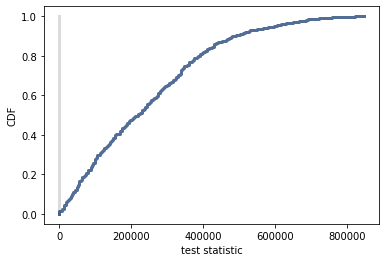

In [132]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [133]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.476

We can most definately reject the null hypothesis, with a p-value of 1, and one-sided p-value of .5. There is no evidence that the means equal. There might be something else going on as well, for example everything may not be documented for property damage. 

In [134]:
import statsmodels.formula.api as smf
model = smf.ols('DAMAGE_PROPERTY_t ~ YEAR + C(TOR_F_SCALE) ', data=t_df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DAMAGE_PROPERTY_t   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     534.2
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:33:04   Log-Likelihood:            -1.2430e+06
No. Observations:               68456   AIC:                         2.486e+06
Df Residuals:                   68449   BIC:                         2.486e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -9.378e+07   8.07e+06    -11.625      0.000    -1.1e+08    -7.8e+07
C(TOR_F_SCALE)[T.EF1]  5.804e+05   1.66e+05      3.505      0.000    2.56e+05    9.05e+05
C(TOR_F_SCALE)[T.EF2]  1.985e+06   2.19e+05      9.077      0.000    1.56e+06    2.41e+06
C(TOR_F_SCALE)[T.EF3]   5.97e+06   3.44e+05     17.362      0.000     5.3e+06    6.64e+06
C(TOR_F_SCALE)[T.EF4]  1.914e+07   5.75e+05     33.270      0.000     1.8e+07    2.03e+07
C(TOR_F_SCALE)[T.EF5]  6.965e+07   1.59e+06     43.809      0.000    6.65e+07    7.28e+07
YEAR                   4.697e+04   4038.906     11.629      0.000    3.91e+04    5.49e+04
==============================================================================
Omnibus:                   258435.857   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     285418950166.893
Skew:                          85.430   Prob(JB):                         0.00
Kurtosis:                   10004.794   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have establisheed that year and damage property don't appear to have a linear relationship. I decided to run all the data through the model with the tor_f_scale as a categorical variable. The p-value for all of these are less than 0. Meaning that they are significant. The F-statistic is ~500 so we can reject the null hypothesis that there is not a relationship among these varialbes.Note the $R^2$ = .045, indicating that YEAR and TOR_F_SCALE only accounts for  4.5% variability on DAMAGE_PROPERTY. 

I believe there could be different ways to look at this data, maybe even look at different models and include death and injuries. I did this below, the F-statistic increased, so still no good. The $R^2$ value increased, so injuries and deaths play a role in damage to property. As of right now no conclusions can be made based off the test and models we ran. 

In [135]:
import statsmodels.formula.api as smf
model = smf.ols('DAMAGE_PROPERTY_t ~ YEAR +INJURIES_DIRECT+DEATHS_DIRECT +C(TOR_F_SCALE) ', data=t_df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DAMAGE_PROPERTY_t   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     2356.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:33:11   Log-Likelihood:            -1.2363e+06
No. Observations:               68456   AIC:                         2.473e+06
Df Residuals:                   68447   BIC:                         2.473e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -9.123e+07   7.31e+06    -12.483      0.000   -1.06e+08   -7.69e+07
C(TOR_F_SCALE)[T.EF1]  4.566e+05    1.5e+05      3.043      0.002    1.63e+05    7.51e+05
C(TOR_F_SCALE)[T.EF2]  1.342e+06   1.98e+05      6.767      0.000    9.53e+05    1.73e+06
C(TOR_F_SCALE)[T.EF3]  2.633e+06   3.13e+05      8.413      0.000    2.02e+06    3.25e+06
C(TOR_F_SCALE)[T.EF4]  2.978e+06   5.38e+05      5.532      0.000    1.92e+06    4.03e+06
C(TOR_F_SCALE)[T.EF5]  1.201e+07   1.52e+06      7.887      0.000    9.03e+06     1.5e+07
YEAR                   4.569e+04   3659.281     12.485      0.000    3.85e+04    5.29e+04
INJURIES_DIRECT        2.878e+05   5966.469     48.238      0.000    2.76e+05       3e+05
DEATHS_DIRECT          3.323e+06   7.34e+04     45.284      0.000    3.18e+06    3.47e+06
==============================================================================
Omnibus:                   233278.052   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     114310609521.752
Skew:                          62.698   Prob(JB):                         0.00
Kurtosis:                    6332.333   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""